In [7]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns 
from functions.spotipyTools import *
from dotenv import load_dotenv
import os

In [8]:
load_dotenv()

True

In [9]:
e_client_id = os.environ["client_id"]
e_client_key = os.environ["client_key"]
e_playlist_id = os.environ["playlist_id"]
e_user_id = os.environ["user_id"]

client_credentials_manager = SpotifyClientCredentials(e_client_id, e_client_key)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [10]:
df_tracks = pd.read_parquet('PlaylistTracks.parquet')

In [11]:
artists = df_tracks['artist_url'].unique()
genres = get_artist_genre(artists, sp)

In [12]:
exploded_genres = pd.Series(genres, name='Genre').explode().reset_index()
text = ' '.join(str(i) for i in exploded_genres.Genre)

In [13]:
wordcloud = WordCloud(background_color='White').generate(text)

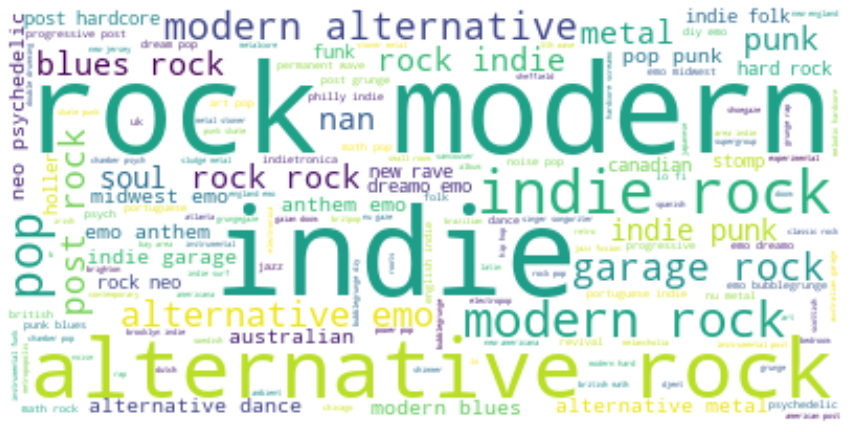

In [14]:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()